### Jupyter Notebook Cheat sheet

- https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed

### Time and Date: converting back and forth

In [13]:
import datetime as dt
# Seconds --> Time HH:MM:SS --> datetime
times = [dt.datetime.combine(dt.date.today(), dt.time(0,0)) + dt.timedelta(seconds=5*x) for x in range(0, int(60*60*24/5))]
# Datetime to String like mmss
mmss = [t.strftime('%M:%S') for t in times]
# Datetime to seconds
seconds = [f"{int((t - t.replace(hour=0, minute=0, second=0, microsecond=0)).total_seconds())}s" for t in times]
seconds_int = [int((t - t.replace(hour=0, minute=0, second=0, microsecond=0)).total_seconds()) for t in times]

In [25]:
# Seconds to timeformat HH:MM:SS
str(dt.timedelta(seconds=3600))

'1:00:00'

## Pandas

In [3]:
import pandas as pd
import datetime

In [ ]:
## Reading dat.gz (compressed files)

# Default
df = pd.read_csv('filename.tar.gz', compression='gzip', header=5, sep=',', quotechar='"')

# Solution to: pandas.errors.ParserError: Error tokenizing data. C error: EOF inside string starting at line x
dfx = pd.read_csv('DYCE_FX_FG_FXX_201706_new.dat.gz',compression='gzip',header=5,sep=',', quotechar=None,quoting=3)


In [ ]:
# PANDAS: Group and aggregate data using custom functions (NOT RUN)

f = {'tradesize':['sum'],'ordernetsize':['sum'],
     'spot':lambda x: np.average(x,weights=self.data_withClusters.loc[x.index,"tradesize"]), # weighted average
     'bmbinfirst':['first'],'bmbinlast':['last'],
     # clustermethod:['max']} # WORKS...
     'mostFreq':lambda x:x.value_counts().index[0]}

df_aggregate = df.groupby(['ccy','trdate','timebincoarse']).agg(f).reset_index()
collist = ['ccy','trdate','start5minbin','binturnover','binnetflow','binprice','bmbinfirst','bmbinlast',
           'cluster_new']
df_aggregate.columns = collist


In [ ]:
# Rename columns using lambda: for some mechanic change
df2go = df2go.rename(columns=lambda x: x[:x.find('[')]) # remove the last letters

In [ ]:
# Create Stacked Bins by setting a temporary index

# Stack bins to columns
myCols = ['itgID','ticker','sign','tradeDate','mddv','histVola']
df2go = df2go.set_index(myCols)
df2go.columns.name = 'bin'
df2go = df2go.stack() # become a series
df2go.name = 'ExPriceForBin'
df2go = df2go.reset_index() # will convert back to the original myCols with stacked bins

In [25]:
# Append: simplest way to keep stacking new df with same columns
df1 = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'))
df2 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'))
print('Append:')
display(df1.append(df2))
# Concatenate: put together (will use the index as key)
print('Concat:')
display(pd.concat([df1,df2],axis=0))
# Merge: will merge on the key, choose left and right sides
print('Merge:')
pd.merge(df1,df2,on=['A'],how='outer') # default: how='inner'
# Join: similar to merge but will use the index as the key
print('Join:')
df1.join(df2,lsuffix='_left',rsuffix='_right')

Append:


,A,B
0,1,2
1,3,4
0,5,6
1,7,8


Concat:


,A,B
0,1,2
1,3,4
0,5,6
1,7,8


Merge:
Join:


,A_left,B_left,A_right,B_right
0,1,2,5,6
1,3,4,7,8


In [14]:
import numpy as np
import time as tt
## Applying a function to multiple columns
df = pd.DataFrame({"A": [10,20,30], "B": [20, 30, 10]})
# 1) Simple operation
tic = tt.time()
df['new_column'] = np.multiply(df['A'], df['B'])
print('Solution 0: Time taken:',tt.time()-tic)
# 2) Defining a function and apply
def fxy(x, y):
    #print(np.max([x,y]))
    return x * y
tic = tt.time()
df['new_column'] = df.apply(lambda x: fxy(x['A'], x['B']), axis=1)
print('Solution 1: Time taken:',tt.time()-tic)
# 3) Using vectorize (more efficient!)
# for index, row in df.iterrows(): # Not efficient... bad for computations.
tic = tt.time()
df['new_column'] = np.vectorize(fxy)(df['A'], df['B'])
print('Solution 2: Time taken:',tt.time()-tic)

Solution 0: Time taken: 0.0009210109710693359
20
30
30
Solution 1: Time taken: 0.0039017200469970703
20
20
30
30
Solution 2: Time taken: 0.0008029937744140625


In [16]:
# Datetime: convert datetime objects to int. 
# - Even if they are originally in datetime, looks like has to convert use pd.to_datetime()

import pandas as pd
df = pd.DataFrame({"Date": ["2014-03-29", "2014-03-30", "2014-03-31"]})
df["Date"] = pd.to_datetime(df["Date"]).dt.strftime("%Y%m%d").astype('int')
print( df )

       Date
0  20140329
1  20140330
2  20140331


In [ ]:
# Convert data from String to datetime format
df['t0'] = pd.to_datetime('20181202',format='%Y%m%d', errors='ignore') # works only for single instances.. not working for whole...
# Convert to seconds from String (easier)
df['t0'] = df.starttime.apply(lambda x: 3600*int(x.split(':')[0])+60*int(x.split(':')[1])+int(x.split(':')[2])).astype(str)+'s' 


In [ ]:
# Sort by

df.sort_values(by=['col1', 'col2'])

In [ ]:
# Discretize variables based on quantiles

#out,bins = pd.qcut(condVar,q=nsplit,labels=False,retbins= True)
out, bins = pd.qcut(condVar, q=nsplit, labels=False, retbins=True) # exclude zeros of Y (no execution...)
bin_range = [[bins[i],bins[i+1]] for i in range(len(out.unique()))]
    

In [ ]:
## Count the unique items
df2go['algoStrategy'].value_counts()


In [13]:
## Add row-by-row in pandas
# - Create the inputfile (DF) from using a dictionary to add each Row (EFFICIENT!)

## Set your configuration
ccyall = ['AUDUSD']
dates = [20180111]
itime = 14+5 # initial hours in GMT (try before 2pm so that we can add 2hrs without issues...)
mydurations = [5,120] # (x2)
myorders = [1,1000] # in millions (x2)
timerange = []
for dur in mydurations:
    timerange.append([str(itime*3600)+'s',str(itime*3600+dur*60)+'s'])
    
row_list = []
for ccy in ccyall:
    for day in dates:
        for t in timerange:
            for s in myorders:
                d = {}
                d['token'] = ccy+'_'+str(day)+'_'+t[0]+'_'+t[1]+'_'+str(s)
                d['ISO'] = 'FXX'
                d['date'] = day
                d['ccy'] = ccy[0:3]+'.'+ccy[3:6]
                d['starttime'] = t[0] 
                d['endtime'] = t[1]
                d['startshare'] = 0
                d['endshare'] = s
                row_list.append(d)
# Create df from dic
inputfile = pd.DataFrame(row_list)
desired_colOrder = ['token', 'ISO', 'date', 'ccy', 'starttime', 'endtime', 'startshare','endshare']
inputfile = inputfile[desired_colOrder]
inputfile

,token,ISO,date,ccy,starttime,endtime,startshare,endshare
0,AUDUSD_20180111_68400s_68700s_1,FXX,20180111,AUD.USD,68400s,68700s,0,1
1,AUDUSD_20180111_68400s_68700s_1000,FXX,20180111,AUD.USD,68400s,68700s,0,1000
2,AUDUSD_20180111_68400s_75600s_1,FXX,20180111,AUD.USD,68400s,75600s,0,1
3,AUDUSD_20180111_68400s_75600s_1000,FXX,20180111,AUD.USD,68400s,75600s,0,1000


## Sklearn ML

In [5]:
## 1) Checking the default parameters
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [8]:
## 2) Randomized GridSearch
# - Ref: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
# - https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/random_forest_explained/Improving%20Random%20Forest%20Part%202.ipynb
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# (cont)
# Fit
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_features, train_labels) # NEED DATA...
# Get the best parameters
rf_random.best_params_


## I/O

In [5]:
# More efficient way of wrking with paths...
# REF: 
# - https://realpython.com/python-pathlib/
# - https://docs.python.org/3/library/pathlib.html
from pathlib import Path
# Joining paths
Path.home().joinpath('folder1','folder2')
rr = Path.home() / 'folder1' / 'folder2' 

In [8]:
rr.parts

('/', 'home', 'jide', 'folder1', 'folder2')

In [10]:
rr.exists()

False

In [ ]:
import pickle
## Save and Load objects
myobj = someclass()
# Save
pickle.dump(myobj,open("holdobj.p","wb"))
# Load
myobj = pickle.load(open("holdobj.p","rb"))


## Utils

In [11]:
# Magic command to update external library in every cell in Jupyter!
%load_ext autoreload
%autoreload 2

In [13]:
# Parsing arguments from dictionary
import argparse

def ji_example(dicflag):
    nn = argparse.Namespace(**dicflag)
    print(nn.a)
d = {"a": 3, "b": 12}
ji_example(d)

3


In [11]:
## Switch function using dictionary: assign one or another value to a variable depending on another varible
x= 'cloudy'
mean_temp = {'cloudy': 55.0, 'sunny': 75.0}[x]
print(mean_temp)


55.0


## PLOTS

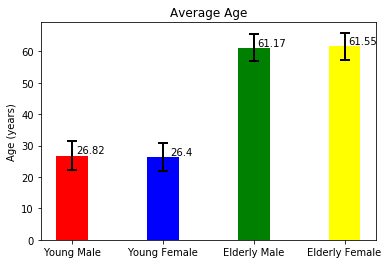

In [13]:
import numpy as np
import matplotlib.pyplot as plt

means   = [26.82,26.4,61.17,61.55]         # Mean Data 
stds    = [4.59,4.39,4.37,4.38]            # Standard deviation Data
peakval = ['26.82','26.4','61.17','61.55'] # String array of means

ind = np.arange(len(means))
width = 0.35
colours = ['red','blue','green','yellow']

plt.figure()
plt.title('Average Age')
for i in range(len(means)):
    #plt.bar(ind[i],means[i],width,color=colours[i],align='center',yerr=stds[i],ecolor='k')
    plt.bar(ind[i],means[i],width,color=colours[i],align='center',yerr=stds[i],
            error_kw=dict(ecolor='k', lw=2, capsize=5, capthick=2))
    
plt.ylabel('Age (years)')
plt.xticks(ind,('Young Male','Young Female','Elderly Male','Elderly Female'))

def autolabel(bars,peakval):
    for ii,bar in enumerate(bars):
        height = bars[ii]
        plt.text(ind[ii]+0.2, height, '%s'% (peakval[ii]), ha='center', va='bottom')

autolabel(means,peakval)
plt.show()

## Jupyter notebook Hacks

In [1]:
%matplotlib inline
%matplotlib notebook # Interactive

UsageError: unrecognized arguments: # Interactive


### Color font
<font color=red>(similar to volatility)</font> 

# This is a level 1 heading
## This is a level 2 heading
This is some plain text that forms a paragraph.
Add emphasis via **bold** and __bold__, or *italic* and _italic_.

Paragraphs must be separated by an empty line.

* Sometimes we want to include lists.
 * Which can be indented.

1. Lists can also be numbered.
2. For ordered lists.

[It is possible to include hyperlinks](https://www.example.com)

Inline code uses single backticks: `foo()`, and code blocks use triple backticks:

```
bar()
```

Or can be intented by 4 spaces:

    foo()

And finally, adding images is easy: ![Alt text](https://www.example.com/image.jpg)

1. [Intro](#intro)<br>
    1.1 [Part A](#pA)<br>
    1.2 [Part B](#pB)<br>
    1.3 [Part C](#pC)<br>
2. [Main](#main)<br>

### Plots and visualization

In [ ]:
## HISTOGRAM --> MY CHOICE: plt.hist() is more friendly and flexible

#sns.distplot(ds1[ds2.between(crange[0],crange[1])]) # DOES NOT SHOW FREQUENCY...
#ds1[ds2.between(crange[0],crange[1])].hist(bins=100) # not sure how to get the x and y...
y, x, _ = plt.hist(ds1[ds2.between(crange[0],crange[1])].values,bins=50)
#print(dfx[condName].describe())
#print('%s>0: %d bins(5min)' % (condName,np.sum(dfx[condName] > 0)))
#print('%s<0: %d bins(5min)' % (condName,np.sum(dfx[condName] < 0)))
plt.title('Distribution of %s (range#%d:%2.3f-%2.3f)'%(varName,i,crange[0],crange[1]))

## ANNOTATION --> MY CHOICE: use plt.text: you can set your font size easily!
#plt.annotate('test',xy=(x.max()*0.3,0.95*y.max()))
plt.text(x.max()*0.3,0.95*y.max(),'test',fontsize=16)

### DateTime

In [4]:
mydate = datetime.datetime(2017,1,3)
mydate

datetime.datetime(2017, 1, 3, 0, 0)